# Gas compressibility and viscosity

We now investigate correlations for gas compressibility factors $Z$ and gas viscosity  $\mu_g$.
The key sources are:
1. Ding-Yu Peng & Donald B. Robinson, **A New Two-Constant Equation of State**, *Ind. Eng. Chem. Fundam., Vol. 15, No. 1*, 1976
[link](https://pubs.acs.org/doi/abs/10.1021/i160057a011)
1. Azad Jarrahian, Babak Aghel, Ehsan Heidaryan, **On the viscosity of natural gas**, *Fuel 150 Pp 609–618*, 2015 [link](https://www.sciencedirect.com/science/article/pii/S0016236115001970)

__Status__ 28/4/2020
-   Summarised the Peng and Robinson Paper.
-   Verified the math and aritmetic at the critical point.
-   Computed the compressibilities of methane and ethane (correctly).
Possible Futures
-   Tie in to Van der Waals forces (engineeringunits link)
-   Talk about mixtures.
-   Talk about improved correlations.
-   Add info about equations of state.
-   __Clean-up the code and comments; move utilites out of the way__

We start by decomposing pressure into a repulsive and attractive component motivated by non-ideal kinetic theory and an inter-molecular attractive force.

$$ P = P_R + P_A = \frac{RT}{V-b} - \frac{a}{g(V)} $$ 
where $b$ is related to the size of the 'hard' molecules (independent of $T$), $a$ is a representation of the inter-molecular attraction (and is a function of $T$). $g(V)$ is a function of the molar volume, $V$. Peng and Robinson suggest that:
$$P = \frac{RT}{V-b} - \frac{a(T)}{V(V+b)+b(V-b)} ~~~~~~~~~~~~~~~\textsf{Eqn: PR}$$
or, introducing $Z = \frac{PV}{RT}$ we can write:
$$Z^3 - (1-B)Z^2 + (A-3B^2 -2B) Z - (AB -B^2 - B^3) = 0$$
where 
$ A = \frac{aP}{(RT)^2}, B = \frac{bP}{RT} $

Of course, we can write this as:
$$ Z^3 - Z^2 + [ B Z^2 + (A-3B^2 -2B) Z - (AB -B^2 - B^3) ] = 0 
$$
which is consistant with the statement that $Z = 1$ for an ideal gas (because $ a = b = 0$ for an *ideal* gas).

At the critical point we have:
$$ \left. \frac{\partial P}{\partial V} \right |_T = 0 ~~\textsf{and}~~  \left. \frac{\partial^2 P}{\partial V^2} \right |_T = 0$$ which leads to:
$$
a(T_c) = 0.45724 \frac{R^2T_c^2}{P_c} , ~~b(T_c) = 0.07780 \frac{RT_c}{P_c} ~~\textsf{and}~~ Z_c = 0.307 
$$

At other temperatures it is reasonable to write: $b(T) = b(T_c)$ (a constant)
and $a(T) = a(T_c)\times\alpha(T_r,\omega)$ 

where $T_r = T/T_c$ is the reduced temperature and $\omega$ is an 'acentric' factor; clearly we need $\alpha(1,\omega) \equiv 1 ~~~~\forall~ \omega$.

Comparison with experimental data gives:
\begin{align}
\sqrt{\alpha} = 1 + \kappa \left(1 -T_r^{\frac{1}{2}}\right)
\end{align}
with:
$$\kappa = 0.37464 + 1.54226\omega - 0.26992 \omega^2 $$
Values of $\omega$ can be found from this graph taken from Peng and Robinson.
(_This data is also available in tabular form at: [Reid et al.](http://www.kaylaiacovino.com/Petrology_Tools/Critical_Constants_and_Acentric_Factors.htm))_
<img src="DocPengRobDiag.png" />

For methane we have see: [USGS web page](https://pubs.usgs.gov/of/2005/1451/equation.html):
$\omega = 0.0115, T_c = 191.15K, P_c = 4.641 MPa$
The ideal gas constant $R = 8.314413 J mol^{-1}K^{-1}$

For enthalpy diagrams of other fluids see this [on-line worksheet](https://www.questconsult.com/thermo/enthalpy_pressure_diagram.html):

This data is available in tabular form at: [Reid et al.](http://www.kaylaiacovino.com/Petrology_Tools/Critical_Constants_and_Acentric_Factors.htm)

Taken from:
R. C. Reid, J. M. Prausnitz, and B. E. Poling, 1987, The Properties of Gases and Liquids, 4th Ed. New York: McGraw-Hill

 ## Other relevant web sites
1.  https://engineeringunits.com/compressibility-factor-calculator-z/
1.  https://petrowiki.org/Real_gases Hopeless
3.  https://checalc.com/solved/naturalgasZ.html
4.  https://pubs.usgs.gov/of/2005/1451/equation.html (Peng-Robinson equation of state)
5.  http://www.kaylaiacovino.com/Petrology_Tools/Critical_Constants_and_Acentric_Factors.htm
1.  https://engineeringunits.com/compressibility-factor-z-factor/ (Deals with mixtures e.g. Kay's rule - worth a look.)
1.  http://www.peacesoftware.de/einigewerte/methan_e.html (Compressibility factors - and other thermodynamic properties - for a few interesting gases.)

In [1]:
def PolyZ(Z, A, B):
    """
    Evaluate the Peng-Robinson polynomial for the non-dimensional compressibility (Z):
    P(Z,A,B) = Z^3 -(1-B)Z^2 + (A-3B^2-2B)Z-(AB-B^2-B^3)
    Try:
    A=B=0 (the ideal gas case) => Z=0
    and
    PolyZ(0.307,0.45724,0.07780) =0 The coefficients in the PR paper evaluated at the critical point.
    """
    a3 = 1
    a2 = - (1-B)
    a1 = A-3*B*B - 2*B
    a0 = -( A*B - B*B - B*B*B)
    PZ = a3*Z*Z*Z +a2*Z*Z + a1 *Z + a0
    FZ = Z*Z*Z - (1-B)*Z*Z + (A-3*B*B - 2*B) *Z -( A*B - B*B - B*B*B)
    print("Z=",Z," A=",A," B=",B,"ANS=",PZ,FZ)
    return PZ
print("(Ideal Gas ",PolyZ(1,0,0))
print("Critical Point ",PolyZ(0.307,0.45724,0.07780))

Z= 1  A= 0  B= 0 ANS= 0 0
(Ideal Gas  0
Z= 0.307  A= 0.45724  B= 0.0778 ANS= -2.691488000007569e-06 -2.691488000007569e-06
Critical Point  -2.691488000007569e-06


#### Notes on PR coefficients at the critical point
<a id='Notes1'></a>
We differentiate Eqn:PR wrt P:

\begin{align}
\left . \frac{\partial P}{\partial V} \right |_T &= - \frac{RT}{(V-b)^2} + 2a \frac{(V + b)}{(V^2+2bV-b^2)^2}\\ 
\end{align}

which can be written in normalised form as:
\begin{align}
- PositiveFn \times \frac{P^4}{(RT)^5}\left .\frac{\partial P}{\partial V} \right |_T = \{ 2A (Z+B)(Z-B)^2 - (Z^2 + 2BZ -B^2)^2 \}
\end{align}

Evaluating this at the critical point we have: 
$
\left .\frac{\partial P}{\partial V} \right |_T = 0 
$
which is satisfied by the coefficients and value given above.

In [3]:
def DPolyZ(Z,A,B):
    T1 = 2*A*(Z+B)*(Z-B)*(Z-B)
    T2 = Z*Z + 2*B*Z - B*B
    T3 = T2*T2
    DPZ = T1 - T3
    return DPZ
print("Gradient at Critical Point ",DPolyZ(0.307,0.45724,0.07780))

Gradient at Critical Point  -7.684081830307277e-07


We differentiate Eqn:PR **twice** wrt P:

\begin{align}
\left . \frac{\partial^2 P}{\partial V^2} \right |_T &= \frac{2RT}{(V-b)^3} - 2a \frac{(3V^2+6BV + 5b^2)}{(V^2+2bV-b^2)^3}\\ 
\end{align}

which can be written in normalised form as:
\begin{align}
- 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝐹𝑛 \times \frac{RT^2}{P^3}\left .\frac{\partial^2 P}{\partial V^2} \right |_T &= 
2\left \{ -A \frac{3Z^2+6BZ+5B^2}{(Z^2+2BZ - B^2)^3}  + \frac{1}{(Z-B)^3} \right \}\\
&=\left \{ \frac{1}{(Z-B)^3} - A \frac{3Z^2+6BZ+5B^2}{(Z^2+2BZ - B^2)^3} \right \}
\end{align}

Evaluating this at the critical point we have: 
$
\left .\frac{\partial^2 P}{\partial V^2} \right |_T = 0 
$
which is satisfied by the coefficients and value given above.

In [4]:
def D2PolyZ(Z,A,B):
    C1 = 3*Z**2+6*B*Z+5*B**2
    C2 = (Z**2+2*B*Z-B**2)**3
    C3 = A*C1/C2
    C4 = 1/(Z-B)**3
    D2PZ = C3-C4
    return D2PZ
print("Second Gradient at Critical Point ",D2PolyZ(0.307,0.45724,0.07780),"That's quite small?")

Second Gradient at Critical Point  -0.04366953294452003 That's quite small?


In [46]:
from scipy import optimize
def func(x):
    """
    A function to evaluate a scaled function of P, DP/DV, D2P/DV2
    when written in the Peng-Robinson notation of:
    Z,A,B
    """
#First switch to normal notation
    Z=x[0]
    A=x[1]
    B=x[2]
    F=[9.8765,9.0,9.0]
#    print("Z,A,B: ",Z,A,B)
#Calculate P
    F[0] = Z**3 - (1-B)*Z**2 +(A-3*B**2-2*B)*Z - (A*B-B**2-B**3)
#Calculate DP/DV
    T1 = 2*A*(Z+B)*(Z-B)*(Z-B)
    T2 = Z*Z + 2*B*Z - B*B
    T3 = T2*T2
    F[1] = T1 - T3
#Calculate D2P/DV2
    C1 = 3*Z**2+6*B*Z+5*B**2
    C2 = (Z**2+2*B*Z-B**2)**3
    C3 = A*C1/C2
    C4 = 1/(Z-B)**3
    F[2] = C3-C4
    
    print("Z,A,B: ",'{:12.5e}'.format(Z),'{:12.5e}'.format(A),'{:12.5e}'.format(B),
          " F: ",'{:10.2e}'.format(F[0])," DP/DV:",'{:9.1e}'.format(F[1]),"D2P/DV2:",'{:9.1e}'.format(F[2]))

    return F

print("Compressibility for an ideal gas:")
x=x0 = [1.0,0,0]
print("x: ",x, x[0],x[1],x[2])
x=x0 = [0.307,0.45724,0.07780]
print("x: ",x, x[0],x[1],x[2])

FN = func(x0)
print("F: ",FN)

print("Behaviour at the critical point - confirms PR result (Eqns. 9,10,11)")
x=optimize.fsolve(func,x0,full_output=0)
print("Result from optimize.fsolve",x,func(x))


Compressibility for an ideal gas:
x:  [1.0, 0, 0] 1.0 0 0
x:  [0.307, 0.45724, 0.0778] 0.307 0.45724 0.0778
Z,A,B:   3.07000e-01  4.57240e-01  7.78000e-02  F:   -2.69e-06  DP/DV:  -7.7e-07 D2P/DV2:  -4.4e-02
F:  [-2.691488000014508e-06, -7.684081830307277e-07, -0.04366953294452003]
Behaviour at the critical point - confirms PR result (Eqns. 9,10,11)
Z,A,B:   3.07000e-01  4.57240e-01  7.78000e-02  F:   -2.69e-06  DP/DV:  -7.7e-07 D2P/DV2:  -4.4e-02
Z,A,B:   3.07000e-01  4.57240e-01  7.78000e-02  F:   -2.69e-06  DP/DV:  -7.7e-07 D2P/DV2:  -4.4e-02
Z,A,B:   3.07000e-01  4.57240e-01  7.78000e-02  F:   -2.69e-06  DP/DV:  -7.7e-07 D2P/DV2:  -4.4e-02
Z,A,B:   3.07000e-01  4.57240e-01  7.78000e-02  F:   -2.69e-06  DP/DV:  -7.7e-07 D2P/DV2:  -4.4e-02
Z,A,B:   3.07000e-01  4.57240e-01  7.78000e-02  F:   -2.69e-06  DP/DV:  -7.7e-07 D2P/DV2:  -4.4e-02
Z,A,B:   3.07000e-01  4.57240e-01  7.78000e-02  F:   -2.69e-06  DP/DV:  -7.7e-07 D2P/DV2:  -4.4e-02
Z,A,B:   3.07399e-01  4.57236e-01  7.77963e-02  

# Compressibility of Methane for the Frigg pipeline conditions.

In [61]:
def PRZ3(Z):
    """
    Evaluate the Peng-Robinson polynomial for the non-dimensional compressibility (Z):
    P(Z,A,B) = Z^3 -(1-B)Z^2 + (A-3B^2-2B)Z-(AB-B^2-B^3)
    Try:
    A=B=0 (the ideal gas case) => Z=0
    and
    PolyZ(0.307,0.45724,0.07780) =0 The coefficients in the PR paper evaluated at the critical point.
    """
    PRZ3 = Z**3 - (1-Bcap)*Z**2 + (Acap-3*Bcap**2 - 2*Bcap)*Z -( Acap*Bcap - Bcap**2 - Bcap**3)
    print("Z=",Z," A=",Acap," B=",Bcap,"ANS=",PRZ3)
    return PRZ3
Acap=Bcap=0
print("Ideal Gas - PR cubic should be 0",PRZ3(1))
Acap=x[1]
Bcap=x[2]
print("Critical Point - PR cubic should be 0.0:",PRZ3(x[0]))

Z= 1  A= 0  B= 0 ANS= 0
Ideal Gas - PR cubic should be 0 0
Z= 0.3074013086989165  A= 0.4572355289212813  B= 0.07779607390386772 ANS= -3.5318969970887792e-15
Critical Point - PR cubic should be 0.0: -3.5318969970887792e-15


In [72]:
import math
from scipy import optimize
R = 8.314413 # The ideal gas constant
print("Compressibility of Methane")
#R. C. Reid, J. M. Prausnitz, & B. E. Poling, 1987, The Properties of Gases & Liquids, 4th Ed. New York: McGraw-Hill
#    http://www.kaylaiacovino.com/Petrology_Tools/Critical_Constants_and_Acentric_Factors.htm
omega = 0.0115 # acentric factor for methane
kappa = 0.37464+1.54226*omega-0.26992*omega**2
Tc = 191.15; Pc = 4.641E6 # Methane critical point properties
T= 313 ; P = 13.01E6 # Frigg pipeline conditions (Case 9) Frigg - MCP01
Tr = T/Tc; Pr = P/Pc #Compute reduced temperature and pressure
print("Case 9: T =:",T,"K, P =",P,"Pa")
alpha = (1+kappa*(1-math.sqrt(Tr)))**2
print("alpha",alpha,"a(Tr,omega)",aT,"b(Tc)",x[2],"?0.07780")
Acap = (x[1]*Pr*alpha)/Tr**2
Bcap = (x[2]*Pr)/Tr
ZPT = 0
print("START - Acap:",Acap,"Bcap:",Bcap, "ZPT:",x)
zx=optimize.fsolve(PRZ3,0.725,full_output=0)
print("Acap:",Acap,"Bcap:",Bcap, "ZPT:",zx)
print("The Compressibility of methane at Frigg conditions is:", zx, "Looks good")
#
#
#
print("Compressibility of Ethane")
omega = 0.099 # acentric factor for ethane
kappa = 0.37464+1.54226*omega-0.26992*omega**2
Tc = 305.4; Pc = 4.88E6 # Ethane critical point properties
T= 313 ; P = 13.01E6 # Frigg pipeline conditions (Case 9) Frigg - MCP01
Tr = T/Tc; Pr = P/Pc #Compute reduced temperature and pressure
print("Case 9: T =:",T,"K, P =",P,"Pa")
alpha = (1+kappa*(1-math.sqrt(Tr)))**2
print("alpha",alpha,"a(Tr,omega)",aT,"b(Tc)",x[2],"?0.07780")
Acap = (x[1]*Pr*alpha)/Tr**2
Bcap = (x[2]*Pr)/Tr
ZPT = 0
print("START - Acap:",Acap,"Bcap:",Bcap, "ZPT:",x)
zx=optimize.fsolve(PRZ3,0.725,full_output=0)
print("Acap:",Acap,"Bcap:",Bcap, "ZPT:",zx)
print("The Compressibility of ethane at Frigg conditions is:", zx, "Looks good")


Compressibility of Methane
Case 9: T =: 313 K, P = 13010000.0 Pa
alpha 0.7926148333113581 a(Tr,omega) 0.362411662539972 b(Tc) 0.07779607390386772 ?0.07780
START - Acap: 0.37890280709031304 Bcap: 0.13318440448666893 ZPT: [0.30740131 0.45723553 0.07779607]
Z= [0.725]  A= 0.37890280709031304  B= 0.13318440448666893 ANS= [-0.06189843]
Z= [0.725]  A= 0.37890280709031304  B= 0.13318440448666893 ANS= [-0.06189843]
Z= [0.725]  A= 0.37890280709031304  B= 0.13318440448666893 ANS= [-0.06189843]
Z= [0.72500001]  A= 0.37890280709031304  B= 0.13318440448666893 ANS= [-0.06189843]
Z= [0.888186]  A= 0.37890280709031304  B= 0.13318440448666893 ANS= [0.03918211]
Z= [0.8249298]  A= 0.37890280709031304  B= 0.13318440448666893 ANS= [-0.00993247]
Z= [0.83772214]  A= 0.37890280709031304  B= 0.13318440448666893 ANS= [-0.00108712]
Z= [0.83929436]  A= 0.37890280709031304  B= 0.13318440448666893 ANS= [3.69282156e-05]
Z= [0.83924271]  A= 0.37890280709031304  B= 0.13318440448666893 ANS= [-1.29547632e-07]
Z= [0.8392

Z= [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]  A= 0.37890280709031304  B= 0.13318440448666893 ANS= [-0.03036342 -0.02943947 -0.0320996  -0.03759381 -0.0451721  -0.05408446
 -0.0635809  -0.07291142 -0.08132602 -0.0880747  -0.09240745 -0.09357428
 -0.09082519 -0.08341018 -0.07057925 -0.05158239 -0.02566961  0.00790909
  0.04990371  0.10106426]


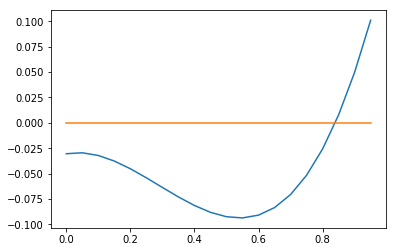

In [67]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# evenly sampled time at 200ms intervals
t = np.arange(0, 1.0, 0.05)
zero = t*0
# red dashes, blue squares and green triangles
plt.plot(t, PRZ3(t),t,zero)
plt.show()